cf. Exercise 4.8, p.144, MLaPP

For a given data set (2D), we will plot the data and fit a MLE bivariate normal in three different ways

1) Original scale without any pre-processing

2) Standardizing: such that the mean will be 0 and the standar deviation of each random variable will be 1

3) Whitening: further process the resulted data matrix from (2), such that the components will be uncorrelated, i.i., the off-diagonal elements of the covariance matrix will be zero


In [1]:
import numpy as np
import pandas as pd

from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv('heightWeightData.txt', header=None)
data.columns = ['label', 'height', 'weight']


In [3]:
def getMuAndSigma(DF):
    mu = DF.mean().values
    N = len(DF)
    X = DF.values
    Sigma = (1.0/N) * X.T.dot(X) - np.outer(mu, mu)
    return mu, Sigma

In [7]:
raw = data[data['label']==1].copy()
raw.drop(['label'], axis=1, inplace=True)

# 1) Raw data 
raw_mu, raw_sigma = getMuAndSigma(raw)
param1 = {'mu': raw_mu, 'sigma': raw_sigma, 'df': raw, 'title': 'raw'}


# 2) Standardizing
standardized = raw.copy()
for i in range(standardized.shape[1]):
    standardized.iloc[:,i] = (standardized.iloc[:,i] - raw_mu[i])/np.sqrt(raw_sigma[i,i])    
# The above can also be achieved by using sklearn.preprocessing.scale:
# scaled = preprocessing.scale(raw.values)

standardized_mu, standardized_sigma = getMuAndSigma(standardized)
param2 = {'mu': standardized_mu, 'sigma': standardized_sigma, 'df': standardized, 'title': 'standardized'}


# 3) Whitening
X = standardized.values
N = X.shape[0]
covariance_matrix = (1.0/N) * X.T.dot(X)
Lambda, U = np.linalg.eig(covariance_matrix)
sqrt_Lambda_inv = np.sqrt(np.linalg.inv(np.diag(Lambda)))
whitened = X.dot(U).dot(sqrt_Lambda_inv)

# The above can also be done row by row
#whitened = np.zeros_like(X)
#for i in range(N):
#    whitened[i,:] = sqrt_Lambda_inv.dot(U.T).dot(X[i,:])

whitened = pd.DataFrame(whitened)
whitened.columns = ['height', 'weight']
    
whitened_mu, whitened_sigma = getMuAndSigma(whitened)
param3 = {'mu': whitened_mu, 'sigma': whitened_sigma, 'df': whitened, 'title': 'whitened'}


params = [param1, param2, param3]

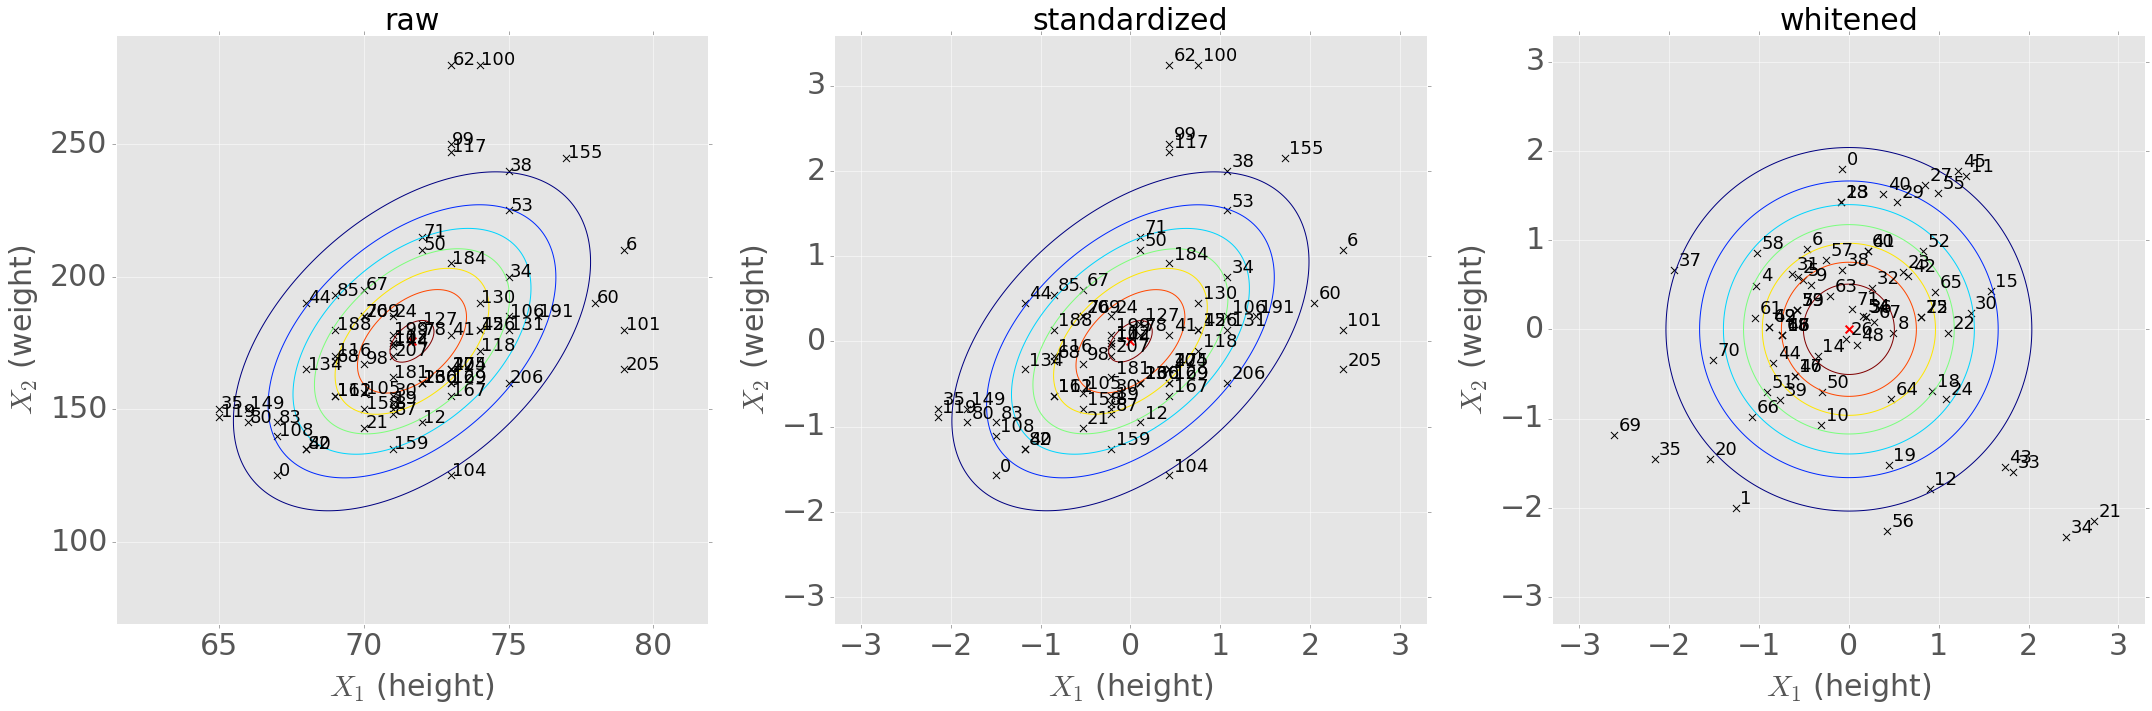

In [14]:
FONTSIZE = 30
plt.close('all')
fig = plt.figure(figsize=(30, 10))
gs = matplotlib.gridspec.GridSpec(1, 3) #, width_ratios=[1, 1])

counter = 0
for i, param in enumerate(params):
    mu = param['mu']
    sigma = param['sigma']
    df = param['df']
    title = param['title']
        
    x1 = np.linspace(mu[0]-3*np.sqrt(sigma[0,0]), mu[0]+3*np.sqrt(sigma[0,0]), 200)
    x2 = np.linspace(mu[1]-3*np.sqrt(sigma[1,1]), mu[1]+3*np.sqrt(sigma[1,1]), 200)
    X1, X2 = np.meshgrid(x1, x2)

    Z = bivariate_normal(X1, X2, np.sqrt(sigma[0,0]), np.sqrt(sigma[1, 1]), mu[0], mu[1], sigma[0, 1])
        
    ax = plt.subplot(gs[0, i])
        
        #X1_MIN, X1_MAX = np.min(x1)-1, np.max(x1)+1
        #X2_MIN, X2_MAX = np.min(x2)-1, np.max(x2)+1

    # Plot MLE bivariate normal        
    ax.contour(X1, X2, Z)
    ax.scatter(mu[0], mu[1], color='r', marker='x', s=60, lw=2)
    
    # Plot data points
    ax.scatter(df['height'], df['weight'], color='k', marker='x', s=50, lw=1)
    for idx, row in df.iterrows():
        ax.annotate(idx, (row['height']+0.05, row['weight']+0.05), fontsize=FONTSIZE*0.6)
    
        
        #ax.set_xlim(X1_MIN, X1_MAX)
        #ax.set_ylim(X2_MIN, X2_MAX)
    ax.set_xlabel(r'$X_1$ (height)', fontsize=FONTSIZE, labelpad=10)
    ax.set_ylabel(r'$X_2$ (weight)', fontsize=FONTSIZE, labelpad=10)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0) 
         
    ax.set_title(title, fontsize=FONTSIZE)
        
plt.tight_layout(w_pad=3, h_pad=1)